In [2]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append('../')
import dataset_wrapper as util

In [4]:
import ee
ee.Authenticate() 
ee.Initialize()

In [ ]:
import geopandas as gpd
dataframe = gpd.read_file('/data2/hkaman/Data/CDL/California_Counties.geojson')
dataframe = dataframe.to_crs(epsg=4326)
dataframe

In [ ]:
county_names = dataframe['NAME'].str[:-7].tolist()
county_names = county_names[27:]
county_names

### ET

In [ ]:
# for name in county_names: 
#     if name != 'Monterey':
for year in range(2008, 2023):
    if year != 2012:
        util.DownloadOpenETEE(year = year, county_name= 'Stanislaus')()

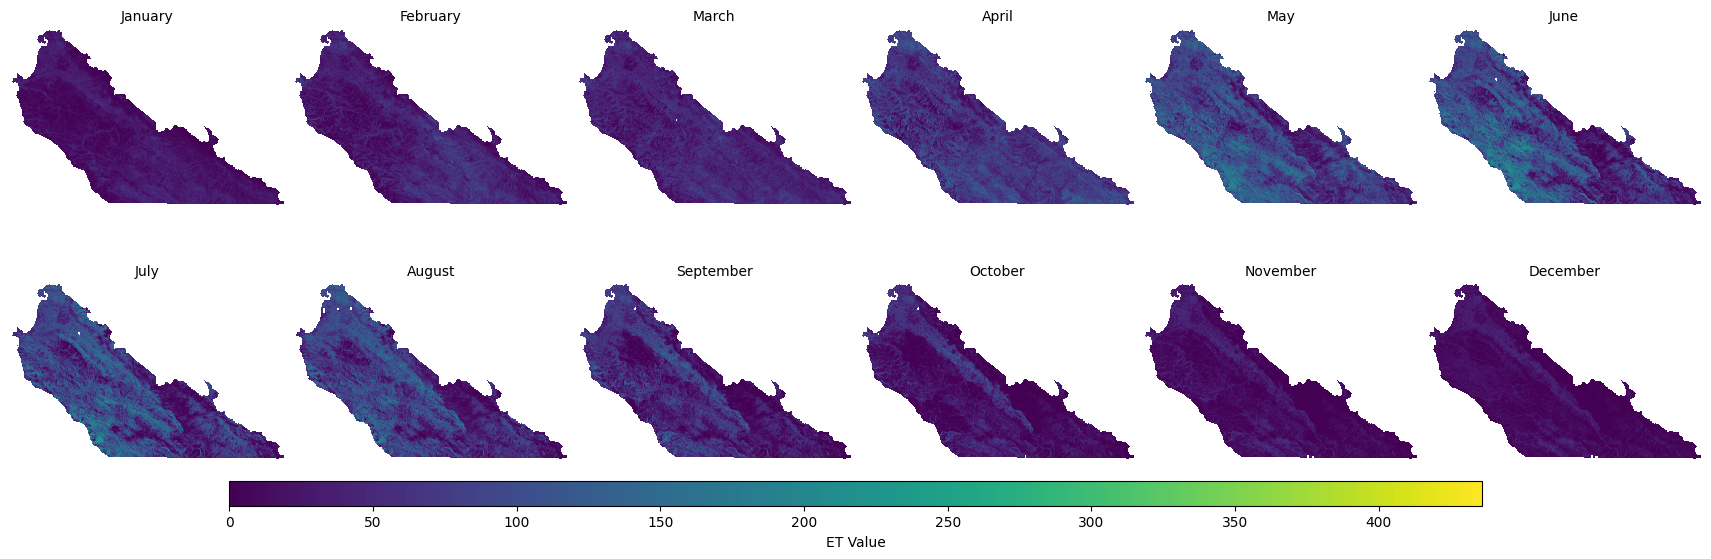

In [ ]:
folder_path = "/data2/hkaman/Data/FoundationModel/Inputs/Monterey/Raw/ET/2020"  # Replace with your folder path
util.plot_tiff_files(folder_path)

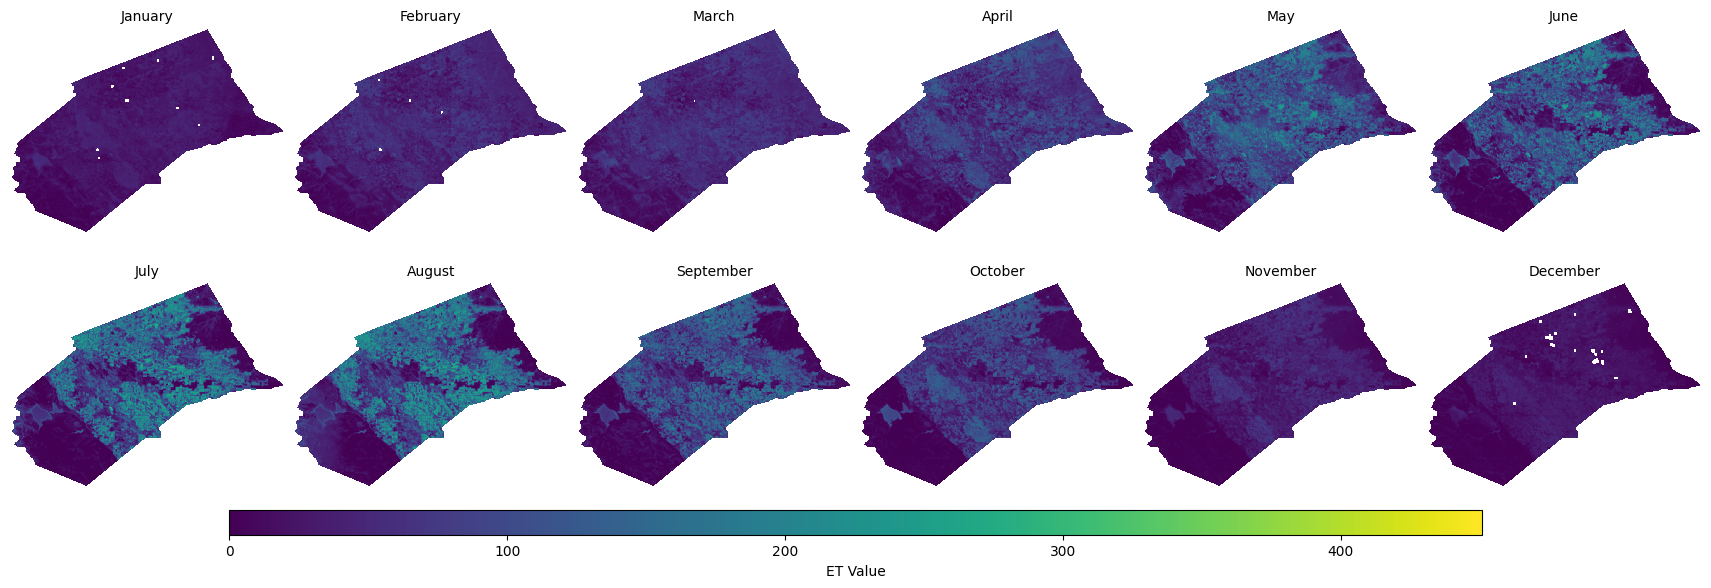

In [ ]:
folder_path = "/data2/hkaman/Data/FoundationModel/Inputs/Merced/Raw/ET/2020"  # Replace with your folder path
util.plot_tiff_files(folder_path)